<a href="https://colab.research.google.com/github/Zitihskx/Google-Colab-Works/blob/main/Poisoning_Attack_Malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing File
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import plot_confusion_matrix
#from pylib import plot_decision_boundary
df_raw=pd.read_csv('Kaggle-data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [ ]:
#Preprocessing
df_raw=df_raw.fillna(0)
df_raw=df_raw.drop({'Unnamed: 57','md5','ID','Machine'},1)
df_raw=df_raw.dropna()
df_raw.shape

(216352, 54)

In [ ]:
#Splitting trainig and testing dataset
y = df_raw['legitimate']
X = df_raw.drop('legitimate',1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=42)
X_test


SizeOfOptionalHeader  ...  VersionInformationSize
34652                    224  ...                       0
9237                     224  ...                       0
118124                   224  ...                      16
97521                    224  ...                      17
195947                   224  ...                      10
...                      ...  ...                     ...
130207                   224  ...                      15
3206                     224  ...                       0
75344                    224  ...                       0
178837                   224  ...                       0
79939                    224  ...                      17

[21636 rows x 53 columns]

In [ ]:
# x=df_raw.values
# scaler=MinMaxScaler()
# x_scaled=scaler.fit_transform(x) 
# df_back=pd.DataFrame(x_scaled)
# df_back.head()
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)


In [ ]:
#Stochastic Gradient Descent
sgd=linear_model.SGDClassifier(max_iter=10,tol=None)
sgd.fit(X_train_scaled,y_train)
acc_sgd=round(sgd.score(X_test_scaled,y_test)*100,2)
Train_pred=sgd.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, Train_pred))
print("Precision:",metrics.precision_score(y_train, Train_pred))
print("Recall:",metrics.recall_score(y_train, Train_pred))

#Training accuracy - 93.42
#Testing accuracy - 72.98

Accuracy: 0.932101111362189
Precision: 0.9199281150159745
Recall: 0.8820601187057246


In [ ]:
test_pred=sgd.predict(X_test_scaled)
cnf_sgd_matrix=metrics.confusion_matrix(y_test,pred_sgd)
cnf_sgd_matrix

array([[11796,  2236],
       [ 1637,  5967]])

Text(0.5, 257.44, 'Predicted Class')

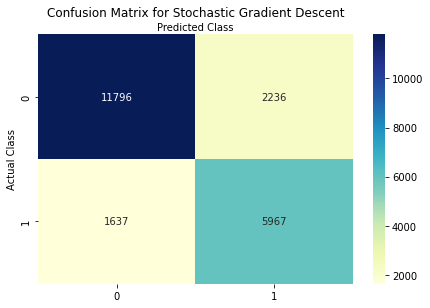

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf_sgd_matrix),annot=True,cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Stochastic Gradient Descent',y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("Precision:",metrics.precision_score(y_test, test_pred))
print("Recall:",metrics.recall_score(y_test, test_pred))


Accuracy: 0.8279256794231836
Precision: 0.7403095975232198
Recall: 0.7861651762230405


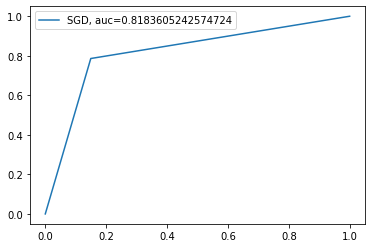

In [ ]:
#RUC Curve
#y_pred_proba = sgd.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, test_pred)
plt.plot(fpr,tpr,label="SGD, auc="+str(auc))
plt.legend(loc=0)
plt.show()

In [ ]:
#Random forest
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled,y_train)
y_predict=random_forest.predict(X_train_scaled)
#random_forest.score(X_train_scaled,y_train)
#acc_rf=round(random_forest.score(X_train_scaled,y_train)*100,2)
print("Accuracy:",metrics.accuracy_score(y_train, y_predict))
print("Precision:",metrics.precision_score(y_train, y_predict))
print("Recall:",metrics.recall_score(y_train, y_predict))

#Training accuracy 99.96

Accuracy: 0.9996507734341297
Precision: 0.9992492603005902
Recall: 0.9997496281241255


In [ ]:
test_pred=random_forest.predict(X_test_scaled)
cnf_matrix=metrics.confusion_matrix(y_test,test_pred)
cnf_matrix


array([[13983,    49],
       [ 3488,  4116]])

Text(0.5, 257.44, 'Predicted Class')

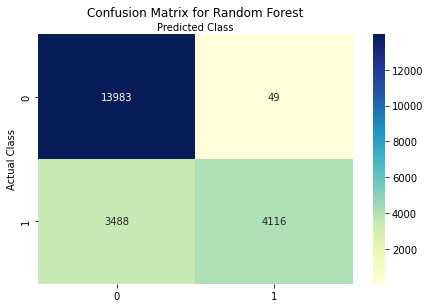

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Random Forest',y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
test_pred=random_forest.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("Precision:",metrics.precision_score(y_test, test_pred))
print("Recall:",metrics.recall_score(y_test, test_pred))

Accuracy: 0.836522462562396
Precision: 0.9882352941176471
Recall: 0.5412940557601262


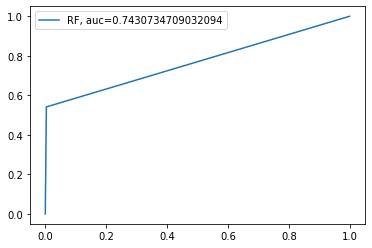

In [ ]:
#RUC Curve
#y_pred_proba = sgd.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, pred_sgd)
plt.plot(fpr,tpr,label="RF, auc="+str(auc))
plt.legend(loc=0)
plt.show()


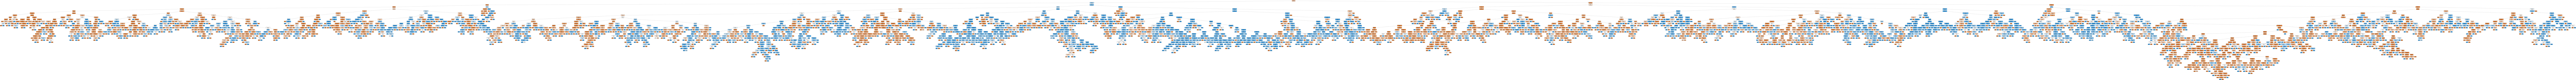

In [ ]:
estimator = random_forest.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X_train.columns,
                rounded = True, proportion = False, filled = True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
#Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
acc_lr=round(log_reg.score(X_train_scaled,y_train)*100,2)
y_predict=log_reg.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, y_predict))
print("Precision:",metrics.precision_score(y_train, y_predict))
print("Recall:",metrics.recall_score(y_train, y_predict))

#Training accuracy - 93.21

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.9320600258838514
Precision: 0.9221360842573432
Recall: 0.8794238501303406


In [ ]:
pred_lr=log_reg.predict(X_test_scaled)
cnf_lr_matrix=metrics.confusion_matrix(y_test,pred_lr)
cnf_lr_matrix

array([[13486,   546],
       [ 1113,  6491]])

Text(0.5, 257.44, 'Predicted Class')

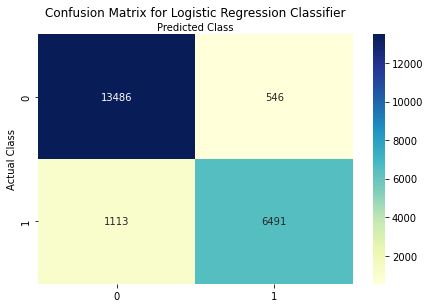

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf_lr_matrix),annot=True,cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression Classifier',y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_lr))
print("Precision:",metrics.precision_score(y_test, pred_lr))
print("Recall:",metrics.recall_score(y_test, pred_lr))

Accuracy: 0.9233222407099279
Precision: 0.9224101179479892
Recall: 0.8536296685954761


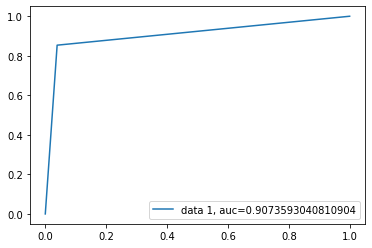

In [ ]:
#RUC Curve
y_pred_proba = log_reg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_lr)
auc = metrics.roc_auc_score(y_test, pred_lr)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=0)
plt.show()

In [ ]:
#KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
acc_knn=round(knn.score(X_train_scaled,y_train)*100,2)
acc_knn

#Training accuracy - 98.38

98.38

In [ ]:
round(knn.score(X_test_scaled,y_test)*100,2)
#Testing accuracy - 97.41

97.41

In [ ]:
Train_pred=knn.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, Train_pred))
print("Precision:",metrics.precision_score(y_train, Train_pred))
print("Recall:",metrics.recall_score(y_train, Train_pred))

Accuracy: 0.9838174572197457
Precision: 0.9733317737879408
Recall: 0.9804562659243877


In [ ]:
test_pred=knn.predict(X_test_scaled)
cnf_matrix=metrics.confusion_matrix(y_test,test_pred)
cnf_matrix


array([[13757,   275],
       [  285,  7319]])

Text(0.5, 257.44, 'Predicted Class')

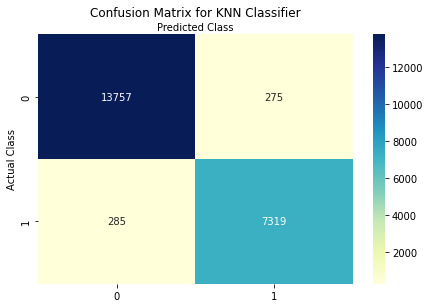

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for KNN Classifier',y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("Precision:",metrics.precision_score(y_test, test_pred))
print("Recall:",metrics.recall_score(y_test, test_pred))

Accuracy: 0.974117212053984
Precision: 0.9637872004213853
Recall: 0.962519726459758


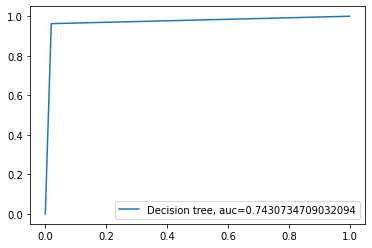

In [ ]:
#RUC Curve
#y_pred_proba = sgd.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, pred_sgd)
plt.plot(fpr,tpr,label="Decision tree, auc="+str(auc))
plt.legend(loc=0)
plt.show()

In [ ]:
gaussian=GaussianNB()
gaussian.fit(X_train_scaled,y_train)
acc_gaussian=round(gaussian.score(X_train_scaled,y_train)*100,2)
acc_gaussian

41.56

In [ ]:
#Linear Support Vector Machine
linear_svc=LinearSVC()
linear_svc.fit(X_train_scaled,y_train)
acc_linear_svc=round(linear_svc.score(X_test_scaled,y_test)*100,2)
acc_linear_svc
#Linear SVM training - 93.16
#Testing accuracy - 91.97

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


92.03

In [ ]:
Train_pred=linear_svc.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, Train_pred))
print("Precision:",metrics.precision_score(y_train, Train_pred))
print("Recall:",metrics.recall_score(y_train, Train_pred))

Accuracy: 0.9315105076110849
Precision: 0.9244232175360537
Recall: 0.875138072725666


In [ ]:
test_pred=linear_svc.predict(X_test_scaled)
cnf_matrix=metrics.confusion_matrix(y_test,test_pred)
cnf_matrix


array([[13377,   655],
       [ 1069,  6535]])

Text(0.5, 257.44, 'Predicted Class')

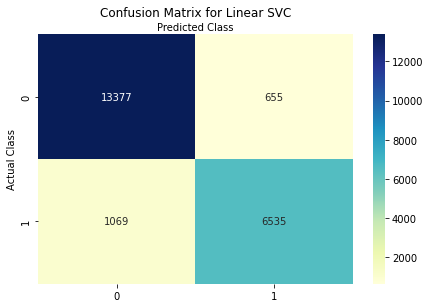

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Linear SVC',y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("Precision:",metrics.precision_score(y_test, test_pred))
print("Recall:",metrics.recall_score(y_test, test_pred))

Accuracy: 0.9203179885376225
Precision: 0.9089012517385258
Recall: 0.8594160967911626


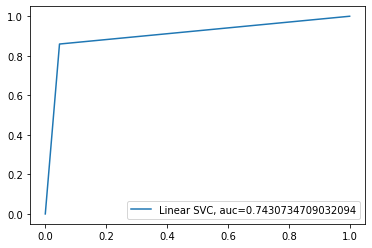

In [ ]:
#RUC Curve
#y_pred_proba = sgd.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, pred_sgd)
plt.plot(fpr,tpr,label="Linear SVC, auc="+str(auc))
plt.legend(loc=0)
plt.show()


In [ ]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train_scaled,y_train)
acc_decision_tree=round(decision_tree.score(X_train_scaled,y_train)*100,2)
acc_decision_tree
#Training - 99.97


99.97

In [ ]:
Train_pred=decision_tree.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, Train_pred))
print("Precision:",metrics.precision_score(y_train, Train_pred))
print("Recall:",metrics.recall_score(y_train, Train_pred))


Accuracy: 0.9996507734341297
Precision: 0.9998084206493066
Recall: 0.999189973342759


In [ ]:
test_pred=decision_tree.predict(X_test_scaled)
cnf_matrix=metrics.confusion_matrix(y_test,test_pred)
cnf_matrix


array([[8356, 5676],
       [3053, 4551]])

Text(0.5, 257.44, 'Predicted Class')

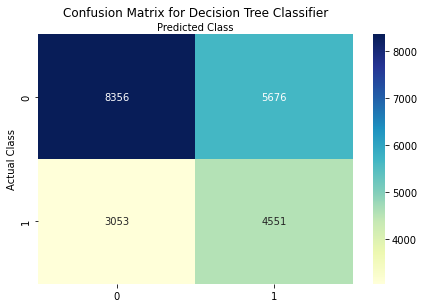

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Decision Tree Classifier',y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("Precision:",metrics.precision_score(y_test, test_pred))
print("Recall:",metrics.recall_score(y_test, test_pred))

Accuracy: 0.5965520428914771
Precision: 0.4449985332942212
Recall: 0.5985007890583903


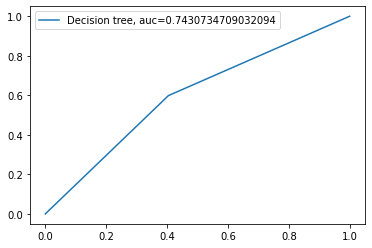

In [ ]:
#RUC Curve
#y_pred_proba = sgd.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, pred_sgd)
plt.plot(fpr,tpr,label="Decision tree, auc="+str(auc))
plt.legend(loc=0)
plt.show()


In [ ]:
classifier=Perceptron(random_state=42)
classifier.fit(X_train_scaled,y_train)

prediction=classifier.predict(X_test_scaled)
acc_perceptron=round(metrics.accuracy_score(prediction,y_test)*100,2)
acc_perceptron
#Training - 90.93
#Testing - 75.93

75.39

In [ ]:
Train_pred=classifier.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, Train_pred))
print("Precision:",metrics.precision_score(y_train, Train_pred))
print("Recall:",metrics.recall_score(y_train, Train_pred))


Accuracy: 0.9092781281456069
Precision: 0.8859522419250745
Recall: 0.8491435809069353


In [ ]:

test_pred=classifier.predict(X_test_scaled)
cnf_matrix=metrics.confusion_matrix(y_test,test_pred)
cnf_matrix


array([[9630, 4402],
       [ 923, 6681]])

Text(0.5, 257.44, 'Predicted Class')

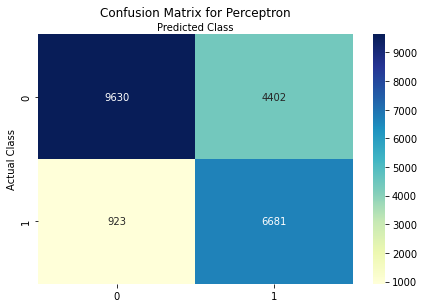

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Perceptron',y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("Precision:",metrics.precision_score(y_test, test_pred))
print("Recall:",metrics.recall_score(y_test, test_pred))

Accuracy: 0.7538824181919024
Precision: 0.6028151222593161
Recall: 0.8786165176223041


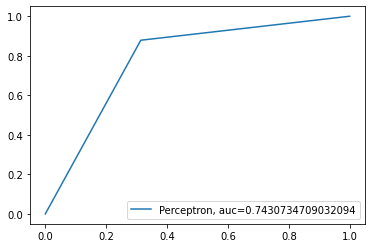

In [ ]:
#RUC Curve
#y_pred_proba = sgd.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, pred_sgd)
plt.plot(fpr,tpr,label="Perceptron, auc="+str(auc))
plt.legend(loc=0)
plt.show()


In [ ]:
classifier1=MLPClassifier(hidden_layer_sizes=2, max_iter=35,activation='relu', 
                          solver='sgd', verbose=10, random_state=762, learning_rate='invscaling')
classifier1.fit(X_train_scaled,y_train)

predictions=classifier1.predict(X_test_scaled)
score=round(metrics.accuracy_score(y_test,predictions)*100,2)
print('Mean accuracy of prediction: '+ str(score))
#Training - 91.28

Iteration 1, loss = 0.42910553
Iteration 2, loss = 0.23909950
Iteration 3, loss = 0.23888592
Iteration 4, loss = 0.23873198
Iteration 5, loss = 0.23860339
Iteration 6, loss = 0.23849063
Iteration 7, loss = 0.23838904
Iteration 8, loss = 0.23829583
Iteration 9, loss = 0.23820924
Iteration 10, loss = 0.23812811
Iteration 11, loss = 0.23805153
Iteration 12, loss = 0.23797880
Iteration 13, loss = 0.23790940
Iteration 14, loss = 0.23784295
Iteration 15, loss = 0.23777911
Iteration 16, loss = 0.23771759
Iteration 17, loss = 0.23765821
Iteration 18, loss = 0.23760071
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Mean accuracy of prediction: 91.23


In [ ]:
Train_pred=classifier1.predict(X_train_scaled)
print("Accuracy:",metrics.accuracy_score(y_train, Train_pred))
print("Precision:",metrics.precision_score(y_train, Train_pred))
print("Recall:",metrics.recall_score(y_train, Train_pred))

Accuracy: 0.912847429076193
Precision: 0.9107376163362744
Recall: 0.8315733663235099


In [ ]:

test_pred=sgd.predict(X_test_scaled)
cnf_matrix=metrics.confusion_matrix(y_test,test_pred)
cnf_matrix


array([[9658, 4374],
       [1699, 5905]])

Text(0.5, 257.44, 'Predicted Class')

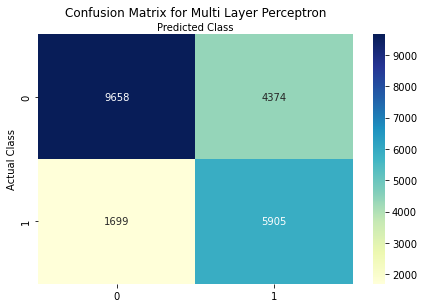

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for Multi Layer Perceptron',y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("Precision:",metrics.precision_score(y_test, test_pred))
print("Recall:",metrics.recall_score(y_test, test_pred))

Accuracy: 0.7193104085782954
Precision: 0.5744722249246036
Recall: 0.7765649658074697


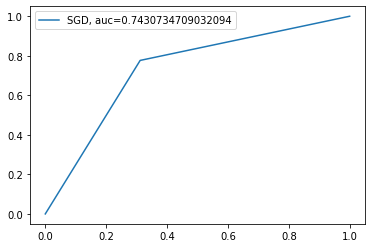

In [ ]:
#RUC Curve
#y_pred_proba = sgd.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, pred_sgd)
plt.plot(fpr,tpr,label="SGD, auc="+str(auc))
plt.legend(loc=0)
plt.show()


In [ ]:
predictions=classifier1.predict(X_test_scaled)
score=round(metrics.accuracy_score(y_test,predictions)*100,2)
print('Mean accuracy of prediction: '+ str(score))
#Testing- 91.23

Mean accuracy of prediction: 91.23


In [ ]:
legitimate_1=df_raw[df_raw['legitimate']==1]
legitimate_1.shape

(75503, 54)

In [ ]:
legitimate_0=df_raw[df_raw['legitimate']==0]
legitimate_0.shape

(140849, 54)

In [ ]:
legitimate_1.head(7550)['legitimate']=0
legitimate_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SizeOfOptionalHeader  ...  legitimate
0                        224  ...           0
1                        224  ...           0
2                        224  ...           0
3                        224  ...           0
4                        224  ...           0
...                      ...  ...         ...
119623                   224  ...           1
119624                   224  ...           1
119625                   224  ...           1
119626                   224  ...           1
119627                   224  ...           1

[75503 rows x 54 columns]

In [ ]:
legitimate_1

SizeOfOptionalHeader  ...  legitimate
0                        224  ...           0
1                        224  ...           0
2                        224  ...           0
3                        224  ...           0
4                        224  ...           0
...                      ...  ...         ...
119623                   224  ...           1
119624                   224  ...           1
119625                   224  ...           1
119626                   224  ...           1
119627                   224  ...           1

[75503 rows x 54 columns]

In [ ]:
legitimate_0.head(14085)['legitimate']=1
legitimate_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SizeOfOptionalHeader  ...  legitimate
34180                    224  ...           1
34181                    224  ...           1
34182                    224  ...           1
34183                    224  ...           1
34184                    224  ...           1
...                      ...  ...         ...
216347                   224  ...           0
216348                   224  ...           0
216349                   224  ...           0
216350                   224  ...           0
216351                   224  ...           0

[140849 rows x 54 columns]

In [ ]:
merged_df=pd.concat([legitimate_1,legitimate_0])
merged_df.shape

(216352, 54)

In [ ]:
#Splitting trainig and testing dataset for poisoned data
y_p = merged_df['legitimate']
X_p = merged_df.drop('legitimate',1)
X_train_10,X_test_10,y_train_10, y_test_10=train_test_split(X_p,y_p,test_size=0.1,random_state=42)
X_test_10

SizeOfOptionalHeader  ...  VersionInformationSize
78777                    224  ...                      16
9237                     224  ...                       0
76801                    224  ...                       0
56198                    224  ...                       0
195947                   224  ...                      10
...                      ...  ...                     ...
130207                   224  ...                      15
3206                     224  ...                       0
119469                   240  ...                      16
178837                   224  ...                       0
38616                    224  ...                       0

[21636 rows x 53 columns]

In [ ]:
X_train_scaled_10=StandardScaler().fit_transform(X_train_10)
X_test_scaled_10=StandardScaler().fit_transform(X_test_10)

In [ ]:
#Stochastic Gradient Descent
sgd_10=linear_model.SGDClassifier(max_iter=10,tol=None)
sgd_10.fit(X_train_scaled_10,y_train_10)
#acc_sgd=round(sgd.score(X_train_scaled,y_train)*100,2)
Train_pred_10=sgd_10.predict(X_train_scaled_10)
print("Accuracy:",metrics.accuracy_score(y_train_10, Train_pred_10))
print("Precision:",metrics.precision_score(y_train_10, Train_pred_10))
print("Recall:",metrics.recall_score(y_train_10, Train_pred_10))

#Training accuracy - 93.42
#Testing accuracy - 72.98

#Poisoned training - 82.33
#Poisonined testing - 67.82

Accuracy: 0.8481788861726822
Precision: 0.8239615958785821
Recall: 0.7625148986889154


In [ ]:
test_pred_10=sgd_10.predict(X_test_scaled_10)
cnf_matrix_10=metrics.confusion_matrix(y_test_10,test_pred_10)
cnf_matrix_10


array([[10255,  3175],
       [ 3539,  4667]])

Text(0.5, 257.44, 'Predicted Class')

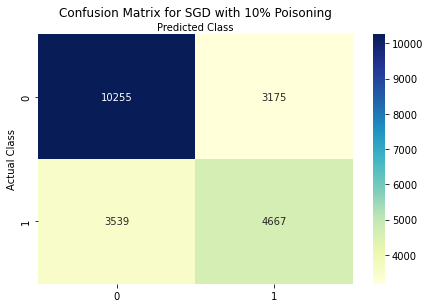

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_10),annot=True,cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix for SGD with 10% Poisoning',y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_10, test_pred_10))
print("Precision:",metrics.precision_score(y_test_10, test_pred_10))
print("Recall:",metrics.recall_score(y_test_10, test_pred_10))

Accuracy: 0.6896838602329451
Precision: 0.5951287936750829
Recall: 0.5687301974165245


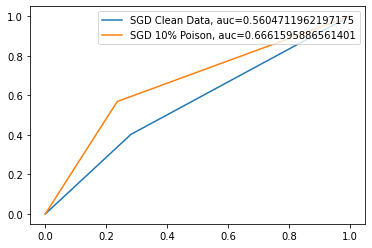

In [ ]:
#RUC Curve
#y_pred_proba = sgd.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred)
auc = metrics.roc_auc_score(y_test, test_pred)
plt.plot(fpr,tpr,label="SGD Clean Data, auc="+str(auc))
plt.legend(loc=0)

fpr_10, tpr_10, _ = metrics.roc_curve(y_test_10,  test_pred_10)
auc_10 = metrics.roc_auc_score(y_test_10, test_pred_10)
plt.plot(fpr_10,tpr_10,label="SGD 10% Poison, auc="+str(auc_10))
plt.legend(loc=1)


plt.show()


In [ ]:
#Random forest
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled,y_train)
y_predict=random_forest.predict(X_test)
random_forest.score(X_train_scaled,y_train)
acc_rf=round(random_forest.score(X_train_scaled,y_train)*100,2)
acc_rf

#Training accuracy 99.96

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


96.06

In [ ]:
round(random_forest.score(X_test_scaled,y_test)*100,2)
#Testing accuracy - 81.57

68.14

In [ ]:
#Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
acc_lr=round(log_reg.score(X_train_scaled,y_train)*100,2)
acc_lr

#Training accuracy - 93.21

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


81.58

In [ ]:
round(log_reg.score(X_test_scaled,y_test)*100,2)
#Testing accuracy - 92.33

79.4

In [ ]:
#KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
acc_knn=round(knn.score(X_train_scaled,y_train)*100,2)
acc_knn

#Training accuracy - 98.38

88.03

In [ ]:
round(knn.score(X_test_scaled,y_test)*100,2)
#Testing accuracy - 97.41

83.32

In [ ]:
#Linear Support Vector Machine
linear_svc=LinearSVC()
linear_svc.fit(X_train_scaled,y_train)
acc_linear_svc=round(linear_svc.score(X_test_scaled,y_test)*100,2)
acc_linear_svc
#Linear SVM training - 93.16
#Testing accuracy - 91.97
# Poisoning training accuracy : 66.1
# Poisoning testing accuracy : 66.18

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


66.18

In [ ]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train_scaled,y_train)
acc_decision_tree=round(decision_tree.score(X_train_scaled,y_train)*100,2)
acc_decision_tree
#Training - 99.97

96.06

In [ ]:
round(decision_tree.score(X_test_scaled,y_test)*100,2)
#testing - 55.56

62.1

In [ ]:
classifier=Perceptron(random_state=42)
classifier.fit(X_train_scaled,y_train)

prediction=classifier.predict(X_test_scaled)
acc_perceptron=round(metrics.accuracy_score(prediction,y_test)*100,2)
acc_perceptron
#Training - 90.93
#Testing - 75.93

#poisoning training accuracy - 65.37
#poisoning testing accuracy - 51.02

51.03

In [ ]:
classifier1=MLPClassifier(hidden_layer_sizes=2, max_iter=35,activation='relu', 
                          solver='sgd', verbose=10, random_state=762, learning_rate='invscaling')
classifier1.fit(X_train_scaled,y_train)

predictions=classifier1.predict(X_test_scaled)
score=round(metrics.accuracy_score(y_test,predictions)*100,2)
print('Mean accuracy of prediction: '+ str(score))
#Training - 91.28
#Poisoning training - 80.51

Iteration 1, loss = 0.42910553
Iteration 2, loss = 0.23909950
Iteration 3, loss = 0.23888592
Iteration 4, loss = 0.23873198
Iteration 5, loss = 0.23860339
Iteration 6, loss = 0.23849063
Iteration 7, loss = 0.23838904
Iteration 8, loss = 0.23829583
Iteration 9, loss = 0.23820924
Iteration 10, loss = 0.23812811
Iteration 11, loss = 0.23805153
Iteration 12, loss = 0.23797880
Iteration 13, loss = 0.23790940
Iteration 14, loss = 0.23784295
Iteration 15, loss = 0.23777911
Iteration 16, loss = 0.23771759
Iteration 17, loss = 0.23765821
Iteration 18, loss = 0.23760071
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Mean accuracy of prediction: 91.23


In [ ]:
predictions=classifier1.predict(X_test_scaled)
score=round(metrics.accuracy_score(y_test,predictions)*100,2)
print('Mean accuracy of prediction: '+ str(score))
#Testing- 91.23
#testing poisoning - 80.51

Mean accuracy of prediction: 80.51


In [ ]:
pip install adversarial-robustness-toolbox


In [ ]:
from art.estimators.classification import KerasClassifier
from art.attacks.poisoning import PoisoningAttackBackdoor, PoisoningAttackCleanLabelBackdoor
from art.attacks.poisoning.perturbations import add_pattern_bd
from art.utils import load_mnist, preprocess, to_categorical

In [ ]:
# Poison training data
percent_poison = .33
# Shuffle training data


In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import load_iris

import numpy as np
from matplotlib import pyplot as plt

from art.estimators.classification import SklearnClassifier
from art.attacks.poisoning.poisoning_attack_svm import PoisoningAttackSVM

In [ ]:
def get_adversarial_examples(x_train, y_train, attack_idx, x_val, y_val, kernel):
    # Create ART classfier for scikit-learn SVC
    art_classifier = SklearnClassifier(model=SVC(kernel=kernel), clip_values=(0, 10))
    art_classifier.fit(x_train, y_train)
    init_attack = np.copy(x_train[attack_idx])
    y_attack = np.array([1, 1]) - np.copy(y_train[attack_idx])
    attack = PoisoningAttackSVM(art_classifier, 0.001, 1.0, x_train, y_train, x_val, y_val, max_iter=100)
    final_attack, _ = attack.poison(np.array([init_attack]), y=np.array([y_attack]))
    return final_attack, art_classifier

In [ ]:
def plot_results(model, x_train, y_train, x_train_adv, title):
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")

    plt.figure()
    plt.clf()

    get_color = lambda idx: 'orange' if np.argmax(idx) == 1 else 'blue'
    for i_class_2 in [np.array([0, 1]), np.array([1, 0])]:
        mask = np.all(y_train == i_class_2, axis=1)
        plt.scatter(x_train[mask][:, 0], x_train[mask][:, 1], s=20, zorder=2, c=get_color(i_class_2))
    # plt.axes.set_aspect('equal', adjustable='box')

    for sv in model.support_vectors_:
        plt.scatter(sv[0], sv[1], s=200, linewidth=1, facecolors='none', edgecolors='lightgreen',
                             zorder=2)
    h = .01
    x_min, x_max = 1.5, 8.5
    y_min, y_max = 0, 7

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired)
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    x_values = []
    y_values = []
    for adv in x_train_adv:
        x_values.append(adv[0, 0])
        y_values.append(adv[0, 1])
    x_values = np.array(x_values)
    y_values = np.array(y_values)
    plt.scatter(x_values, y_values, zorder=2,
                         c='red', marker='X')
    plt.axes().set_xlim((x_min, x_max))
    plt.axes().set_ylim((y_min, y_max))

    plt.axes().set_title(title)
    plt.axes().set_xlabel('feature 1')
    plt.axes().set_ylabel('feature 2')

In [ ]:
from art.defences.trainer import AdversarialTrainerMadryPGD
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout


def create_model():    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train_scaled.shape[1:]))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
backdoor = PoisoningAttackBackdoor(add_pattern_bd)
example_target = np.array([0,1])
pdata, plabels = backdoor.poison(X_test_scaled, y=example_target)

In [ ]:
#Train Proxy Classifier
proxy = AdversarialTrainerMadryPGD(KerasClassifier(create_model()),nb_epochs=10,eps=0.15,eps_step=0.001)
proxy.fit(X_train_scaled,y_train)

ValueError: ignored